# Домашнее задание 3

Это домашнее задание по материалам 5-8 неделей семестра (5-8 лекции). Дедлайн по отправке - 23:59 8 мая.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __МГУ_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __МГУ_3__.

- Для решения можно использовать Google Colab, но присылать нужно не ссылку на Colab, а готовый notebook и все необходимые дополнительные файлы.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Суммарный балл за задание равен 160. Чтобы получить максимальный оценку за задание, нужно набрать 100 баллов. Баллы сверх 100 позволяют набрать оценку выше максимума.

- Часть задач помечена $\triangle$. Они также входят в максимальный балл за задание, но мы считаем, что достаточно выполнить задания без $\triangle$, чтобы вникнуть в основные вещи, происходящие в соотвествующей части задания.

Желаем успехов!

### Часть 1. Снова логистическая регрессия

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathcal{X} \subset \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i),
\end{equation}
где $\ell: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ - функция потерь, $g : \mathbb{R}^d \times \mathbb{R}^x \to \mathbb{R}$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i \in \mathbb{R}^x$ и меток $y_i \in \mathbb{R}$.

Используем линейную модель $g(w, x) = w^T x$ и логистическую/сигмоидную функцию потерь: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Полученная задача называется задачей логистической регрессии. 

В качестве множества $\mathcal{X}$ возьмем $\ell_1$-шар с центром в 0 и радиуса $R$ (параметр, которые можно менять): $\mathcal{X} =\{x \in \mathbb{R}^d \mid \| x \|_1 \leq R \}$.

__Отличия от прошлого домашнего задания:__ убрали регуляризатор, добавили множество $\mathcal{X}$.

Градиент для нашей целевой функции:
$$
\frac{1}{n} \sum_{i=1}^n \frac{-y_i x_i}{1 + \exp(y_i w^Tx_i)}.
$$
В качестве константы Липшица нашей целевой функции можно брать $L = \frac{1}{4n} \sum\limits_{i=1}^n \| x_i \|^2_2$.

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$, в которой и будет храниться выборка $\{x_i, y_i\}_{i=1}^n$:

In [1]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [2]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Поменяем вектор $y$, чтобы $y_i$ принимали значения $-1$ и $1$. Вы также можете сделать дополнительную предобработку данных (приемами из машинного обучения), но это никак дополнительно не оценивается.

In [3]:
y = 2 * y - 3

Разделим данные на две части: обучающую и тестовую.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$. Реализуйте в коде подсчет значения и градиента нашей целевой функции ($X$, $y$ лучше подавать в качестве параметра, чтобы была возможность их менять, а не только подставлять фиксированные $X_{train}$, $y_{train}$). Можно использовать как библиотеку ``numpy``, так и библиотеки ``autograd``, ``pytorch``, ``jax``.

In [5]:
#ваше решение (Code и Markdown)

In [6]:
import numpy as np
import autograd
import autograd.numpy as anp

from sklearn.metrics import accuracy_score

In [7]:
class LogisticRegression():
    def __init__(self, X_train, y_train, init_zeros=True):
        self.X_train = X_train
        self.y_train = y_train
        np.random.seed(10)
        if init_zeros:
            self.weigth = np.zeros(X_train.shape[1])
        else:
            self.weigth = np.random.normal(size=X_train.shape[1])
    
    def loss(self, weigth):
        margin = (self.X_train*weigth).sum(axis=1)
        log = anp.log(1 + anp.exp(-1*self.y_train*margin))
        return anp.sum(log) / self.X_train.shape[0]
    
    def get_grad(self, w=None):
        return autograd.grad(self.loss)(self.weigth) if w is None else autograd.grad(self.loss)(w)
    
    def get_hessian(self):
        return autograd.hessian(self.loss)(self.weigth)

    def get_L(self):
        return (self.X_train**2).sum() / (4*self.X_train.shape[0])
    
    def predict(self, X):
        y_pred = (X*self.weigth).sum(axis=1)
        y_pred = np.where(y_pred==0, 1e-5, y_pred)
        return np.sign(y_pred)
    
    def get_accuracy_score(self, X, y):
        if X is None:
            return None
        return accuracy_score(self.predict(X), y)

In [8]:
log_reg = LogisticRegression(X_train, y_train)
L = log_reg.get_L()
L

5.25

__Задача 1. (всего 60 баллов)__ Так как мы теперь решаем задачу оптимизации на шаре, необходимы методы, учитывающие это.

__а). (5 баллов)__ Для $\ell_1$-шара с центром в 0 и радиуса $R$ найдите выражение для решения задачи линейной оптимизации при заданном векторе $g \in \mathbb{R}^d$:
$$
s^* = \arg \min_{s \in \mathcal{X}} \langle s, g \rangle.
$$

Формально обоснуйте свой ответ, например, можно (необязательно именно так) использовать условия ККТ.

In [9]:
#ваше решение (Code и Markdown)

$$
s^* = \arg \min_{s \in \mathcal{X}} \langle s, g \rangle = \arg \min_{s \in \mathcal{X}} \sum_{i=1}^d s_i g_i
$$
Чтобы минимизировать данную функцию, мы хотим увеличить вклад отрицательных компонент вектора $g$ и минимизировать вклад положительных компонент. То есть для $g_i < 0$ следует брать $s_i > 0$, а для $g_i > 0$ $s_i < 0$. Но приэтом у нас есть ограничение на вектор $s$:
$$
\|s\|_1 \leq R \Leftrightarrow \sum_{i=1}^d |s_i| \leq R
$$
Отсюда видно, что выгоднее всего вложить всю массу в компоненту $s_i$, которая соответствует наибольшему по модулю значению $|g_i|$. То есть, если $|g_i| = \max_j |g_j|$, то вектор $s$ будет состоять из нулевых компонент и $s_i = R$, если $g_i < 0$, и $s_i = -R$, если $g_i > 0$. Если у нас существует несколько таких компонент $|g_i| = \max_j |g_j|$, то можно распределить массу равномерно между ними. Это можно переписать следующим образом:
$$
s_i = \frac{-R*\text{sign}(g_i) * \boldsymbol{\mathbb{1}} \{|g_i| = \max_j |g_j|\}}{\sum_{i=1}^d \boldsymbol{\mathbb{1}} \{|g_i| = \max_j |g_j|\}}
$$

Более строго это можно показать так. Пусть множество $I$ - это множество индексов вектора $g$, соответствующих наибольшей по модулей координате, а множество $J$ остальные. Тогда рассмотрим вектора $s^*$ и $s$. Определим вектор $s^*$ как показано выше. A $y$ произвольно, который удовлетворят ограничениям. Тогда:

$$
g^Ts = \sum_{i=1}^d s_ig_i = \sum_{i \in I} s_ig_i + \sum_{j \in J} s_jg_j \geq \sum_{i \in I} s_ig_i + \sum_{j \in I} s_jg_j = \sum_{i \in I} s_ig^*_i = g^Ts^*
$$

__б). (5 баллов)__ Реализуйте отдельно решение задачи линейной оптимизации из предыдущего пункта (радиус шара $R$ лучше передавать в качестве параметра). Реализуйте метод Франк-Вульфа для нашей задачи. Для заданий далее может понадобиться возможность замерять время работы метода. Советуем также следующим образом брать шаг в алгоритме: если итерации нумеруются с 0, то $\gamma = \frac{2}{k+3}$, если итерации нумеруются с 1, то $\gamma = \frac{2}{k+2}$.

In [11]:
#ваше решение (Code и Markdown)

In [10]:
import time

In [11]:
def argmin(g, R):
    s = np.zeros(g.shape)
    max_g = abs(g) == (abs(g)).max()
    s = np.where(max_g, -R / max_g.sum(), 0)
    return s * np.sign(g) if (abs(g)).max() != 0 else s

In [12]:
g = np.array([4, 2, -4, 3])
argmin(g, R=5)

array([-2.5,  0. ,  2.5,  0. ])

In [13]:
g = np.array([0, 0, 0])
argmin(g, R=5)

array([-1.66666667, -1.66666667, -1.66666667])

In [24]:
def gap(w, grad, R):
    return (grad * (w-argmin(grad, R))).sum()

In [30]:
class FrankWolfe(LogisticRegression):
    def fit(self, R, num_iters=10**4, eps=1e-7, X_test=None, y_test=None):
        history = []
        weigth_prev = self.weigth
        start = time.time()
        gaps = np.array([gap(self.weigth, self.get_grad(), R)])
        
        for i in range(num_iters):
            gamma = 2 / (i+3)
            s = argmin(self.get_grad(), R)
            weigth_new = self.weigth + gamma*(s - self.weigth)
            
            gaps = np.append(gaps, gap(weigth_new, self.get_grad(weigth_new), R))
            history.append([gaps[-1], self.loss(weigth_new), time.time() - start, 
                            self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if abs(gaps.mean() - gaps[:-1].mean()) < eps:
                break
        return self.weigth, history

__в). (10 баллов)__ Решите задачу оптимизации на обучающей выборке с помощью реализованного методов. Возьмите $R = 5$ и стратовую точку в $0$. В качестве критерия используйте следующее выражение:
$$
\text{gap}(w^k) = \max_{y \in \mathcal{X}} \langle \nabla f(w^k), w^k - y \rangle,
$$
или усредненную версию $\frac{1}{k} \sum_{i=1}^k \text{gap}(w^i)$. Такой критерий используем, так как не знаем значение $f^*$ и не можем гарантировать, что $\nabla f(w^*) = 0$. Но можно показать, что $\text{gap}(w^k) \geq f(w^k) - f^*$, а также доаказать сходимость метода Франк-Вульфа по такому критерию, а значит сходимость по $\text{gap}(w^k)$ и дает хорошее понимание о поведении $f(w^k) - f^*$.

Постройте график сходимости: значение критерия сходимости от номера итерации.

In [31]:
import matplotlib.pyplot as plt

In [17]:
def plot(x_axis, y_axis, xlabel, ylabel, labels, title, scale="linear", xscale="linear"):
    plt.title(title, fontsize=17)
    
    for x, y, label in zip(x_axis, y_axis, labels):
        plt.plot(x, y, label=label)

    plt.grid(True)
    plt.legend(fontsize=10)

    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.yscale(scale)
    plt.xscale(xscale)

    plt.show()

In [33]:
#ваше решение (Code и Markdown)

In [34]:
frank = FrankWolfe(X_train, y_train)
frank.weigth = np.zeros(X_train.shape[1])

_, history_frank = frank.fit(R=5, X_test=X_test, y_test=y_test)

In [35]:
history_frank[-1]

[0.00020131284926033777, 0.23918849144553805, 62.79936194419861, 0.968]

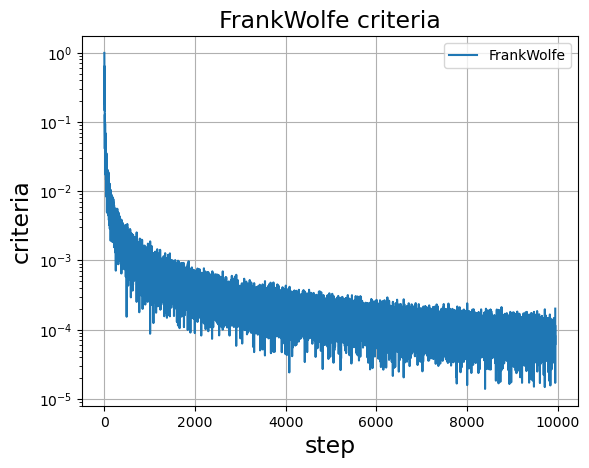

In [40]:
x_axis, y_axis = [], []
for history in [history_frank]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['FrankWolfe']
plot(x_axis, y_axis, 'step', 'criteria', labels, 'FrankWolfe criteria', scale='log')

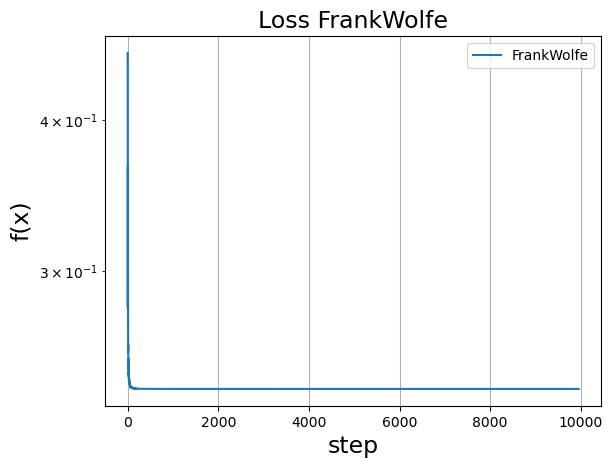

In [41]:
x_axis, y_axis = [], []
for history in [history_frank]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['FrankWolfe']
plot(x_axis, y_axis, 'step', 'f(x)', labels, 'Loss FrankWolfe', scale='log')

Вывидите решение, полученный с помощью метода Франк-Вульфа. Что необычного увидели? Для большей наглядности можете воспользоваться методом Нестерова из прошлого задания и решить с помощью него безусловную задачу (на $\mathbb{R}^d$) без регуляризатора. Сделайте вывод.

In [55]:
#ваше решение (Code и Markdown)

In [42]:
def calc_mode(x_curr, x_next, func, mode):
    if mode == 'f(x_k) - f(x^*)' or mode == 'f(x_k+1) - f(x_k)':
        return abs(func(x_curr) - func(x_next))
    return ((x_curr - x_next)**2).sum()

In [43]:
class FastNesterov(LogisticRegression):
    def fit(self, gamma_k, K=10**4, eps=1e-10, mode='f(x_k+1) - f(x_k)', X_test=None, y_test=None):
        history = []
        weigth_prev = self.weigth
        start = time.time()
        
        for i in range(K):
            momentum = (self.weigth - weigth_prev)/2
            weigth_new = self.weigth - gamma_k*self.get_grad(self.weigth + momentum) + momentum
            
            crit = calc_mode(self.weigth, weigth_new, self.loss, mode)
            history.append([crit, self.loss(weigth_new), time.time() - start, 
                            self.get_accuracy_score(X_test, y_test)])
            weigth_prev = self.weigth
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [44]:
nesterov = FastNesterov(X_train, y_train)
nesterov.weigth = np.zeros(X_train.shape[1])
_, history_nest = nesterov.fit(1/L)

In [45]:
nesterov.get_accuracy_score(X_test, y_test)

1.0

In [46]:
history_nest[-1]

[3.1861210685003513e-07, 0.003267472263322355, 51.1836462020874, None]

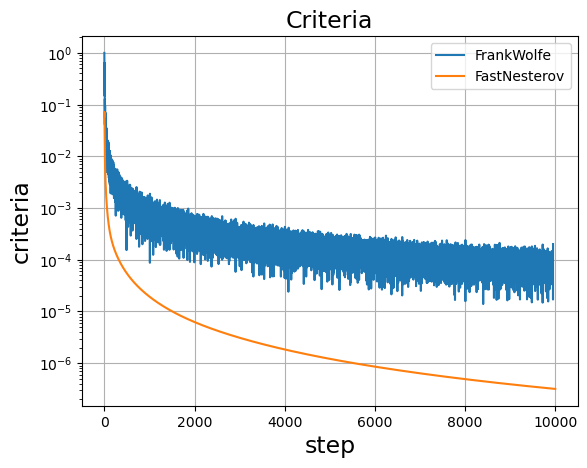

In [47]:
x_axis, y_axis = [], []
for history in [history_frank, history_nest]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['FrankWolfe', 'FastNesterov']
plot(x_axis, y_axis, 'step', 'criteria', labels, 'Criteria', scale='log')

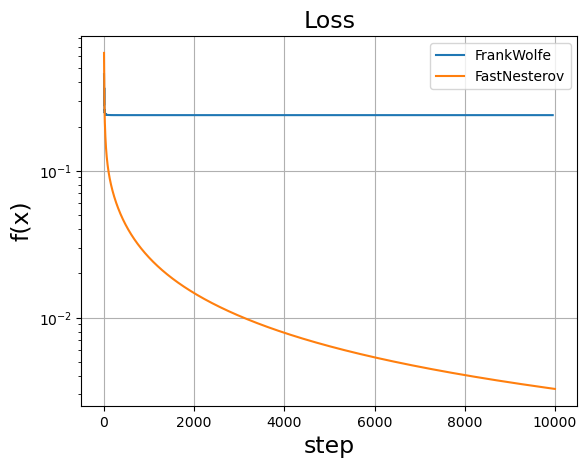

In [48]:
x_axis, y_axis = [], []
for history in [history_frank, history_nest]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['FrankWolfe', 'FastNesterov']
plot(x_axis, y_axis, 'step', 'f(x)', labels, 'Loss', scale='log')

In [49]:
nesterov.weigth

array([-0.60810334, -0.3546261 , -0.09893581, -0.0157409 ,  0.7324305 ,
        0.12338623, -0.04491283, -0.17550856, -0.79857712,  0.79740909,
        0.88230867, -1.38425538, -0.02044036, -0.28042228,  0.60678209,
       -1.34238131,  0.67656356,  0.74758007, -0.62817554,  0.52085109,
       -0.66891897,  0.44732956,  3.68101677, -3.97280292, -4.26019649,
       -0.46052307,  3.66706613,  4.89726042, -2.25467559, -0.76406897,
       -0.75466569,  0.26192648, -0.48351589, -1.42372423,  1.20213482,
        2.66169198, -2.8832814 , -1.7513838 ,  0.6851169 , -0.02612694,
       -0.19989105,  0.76387767,  0.17747201,  0.77106792,  0.54191221,
       -1.04788481,  0.05645654,  0.11765884, -0.30986489, -0.73221828,
        0.51062887, -0.39277508,  1.28030579, -1.62039317,  0.51127305,
       -1.21370258,  0.13382576, -0.55302418,  1.41131159, -0.46052307,
       -0.42318679,  0.6979787 ,  0.45556674,  0.54185223, -0.18186342,
       -0.44555534,  0.24074216, -0.64660062, -0.46052307, -0.39

In [50]:
frank.weigth

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.99414483e-01,  0.00000000e+00,  0.00000000e+00,
       -1.00321774e+00,  0.00000000e+00,  0.00000000e+00,  2.09697213e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.06697685e-07,  0.00000000e+00,  1.40329969e-05,
       -7.51023783e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.05740873e-07, -

Видно, что Нестеров справляется лучше с поставленной задачей. Однако, метод Франк-Вульфа так же хорошо решает решает задачу (качество 0.96), однако по критерию он не сходится и функция потерь остаётся неизменной довольно рано, при большем значении, чем у Нестерова. Но метод Франк-Вульфа зануляет пракчески все компоненты весов. Таким образом, он регуляризует наши признаки, жертвуя при этом точностью сходимости 

__г). (15 баллов)__ В прошлом задании мы, используя полученное решения задачи оптимизации, предсказывали ответы на тестовой выборке. Напомним суть: исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $g$ можно предсказывать значения меток $y$. Пусть у нас есть сэмпл $x_i$, ответ модели для этого сэмпла есть $g(w^*, x^i)$. Тогда предсказывающее правило можно сформулировать следующим довольно естественным образом:
$$
y_i = 
\begin{cases}
1, & g(w^*, x^i) \geq 0,
\\
-1, & g(w^*, x^i) < 0.
\end{cases}
$$
Cделав предсказания на тестовой выборке $X_{test}$, можно сравните результат с реальными метками $y_{test}$. Количество правильно угаданных меток есть точность/accuracy модели.

Посмотрите какую дает модель обученная с помощью метода Франк-Вульфа. Варьируйте $R = 5, 10, 20, 50, 100, 1000$. Постройте три графика: 1) точность итоговой модели от $R$, 2) количество ненулевых компонент в итоговом решении метода Франк-Вульфа от $R$, 3) точность от количества ненулевых компонент в итоговом решении. Сделайте вывод

In [ ]:
#ваше решение (Code и Markdown)

In [51]:
histories, weigth_zeros = [], []
for R in [5, 10, 20, 50, 100, 1000]:
    frank = FrankWolfe(X_train, y_train)
    frank.weigth = np.zeros(X_train.shape[1])
    
    weigth, history = frank.fit(R=R, X_test=X_test, y_test=y_test)
    histories.append(history)
    weigth_zeros.append((weigth!=0).sum())

In [52]:
for h in histories:
    print(len(h), h[-1])

9951 [0.00020131284926033777, 0.23918849144553805, 66.46914315223694, 0.968]
10000 [0.0002034448233685024, 0.12875738710164955, 67.91089487075806, 0.9735384615384616]
10000 [0.00030999130883881815, 0.052339647683341636, 68.0113000869751, 0.9901538461538462]
10000 [0.0002952712766900456, 0.0055800117106178816, 69.49677777290344, 0.9993846153846154]
10000 [3.882764891349321e-05, 0.00023406870238412372, 68.18094301223755, 1.0]
10000 [2.4677243964443434e-09, 4.4011931580849705e-11, 66.70106387138367, 1.0]


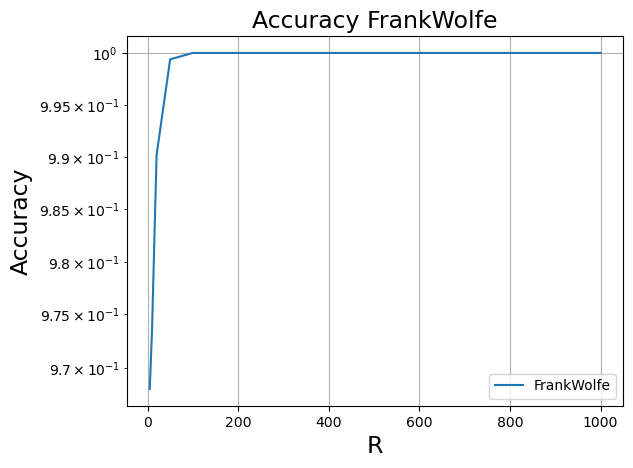

In [53]:
x_axis, y_axis = [], []
for R, history in zip([5, 10, 20, 50, 100, 1000], histories):
    x_axis.append(R)
    y_axis.append(history[-1][-1])
labels = ['FrankWolfe']
plot([x_axis], [y_axis], 'R', 'Accuracy', labels, 'Accuracy FrankWolfe', scale='log')

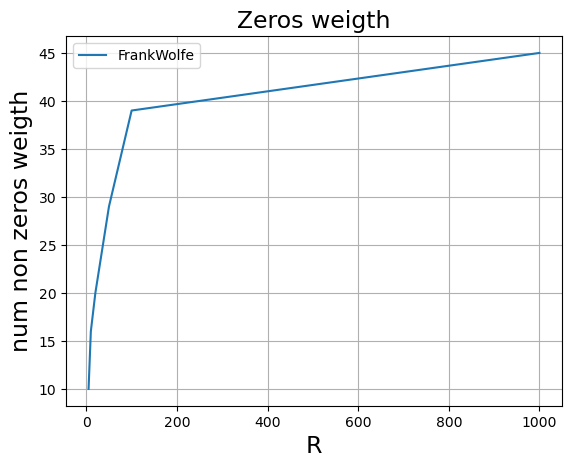

In [54]:
x_axis, y_axis = [], []
for R, history in zip([5, 10, 20, 50, 100, 1000], weigth_zeros):
    x_axis.append(R)
    y_axis.append(history)
labels = ['FrankWolfe']
plot([x_axis], [y_axis], 'R', 'num non zeros weigth', labels, 'Zeros weigth')

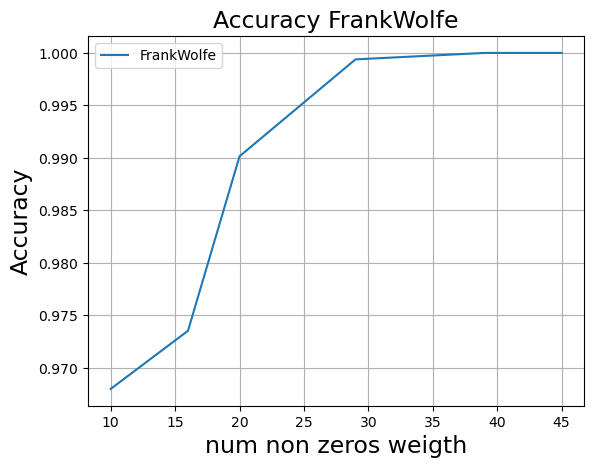

In [55]:
x_axis, y_axis = [], []
for w, history in zip(weigth_zeros, histories):
    x_axis.append(w)
    y_axis.append(history[-1][-1])
labels = ['FrankWolfe']
plot([x_axis], [y_axis], 'num non zeros weigth', 'Accuracy', labels, 'Accuracy FrankWolfe')

Видно, что при увеличении R точность решаемой задачи увеличивается. Лосс, кстати говоря, падает до значений Нестерова и ещё ниже. Так же, очевидно, исходя из алгоритма, что с ростом R уменьшается количество нулевых компонент вектора весов. То есть, чем больше количество ненулевых весов, тем выше качество решаемой задачи.

__д). $\triangle$ (25 баллов)__ Нашу задачу можнно решать и с помощью метода градиентного спуска с евклидовой проекцией. Для этого нужно уметь делать проекцию на $\ell_1$-шар. Найдите способ сделать проекцию в Интернете, достаточно загуглить: "projection onto l1 ball". Изложите здесь суть найденнного подхода (приложите ссылку откуда берете подход) и реализуйте его в коде.

In [ ]:
#ваше решение (Code и Markdown)

Решите задачу оптимизации на обучающей выборке с помощью градиентного спуска с евклидовой проекцией. Сравните на графиках сходимость градиентного спуска и метода Франк-Вульфа: 1) значение критерия от номера итерации, 2) значение критерия от времени. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

__Задача 2. (всего 40 баллов)__ Если до этого момента все получилось сделать правильно, то решение задачи, полученное с помощью метода Франк-Вульфа получалось разряженным (довольно мало ненулевых признаков). Это означает, что с точки зрения машинного обучения мы произвели отбор признаков. Но такой же трюк можно осуществить с помощью $\ell_1$-регуляризации:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \lambda \| w\|_1.
\end{equation}
Задача снова стала безусловная, но композитная - состоящая из двух частей:
\begin{equation}
f(x) = \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i), \quad r(x) = \lambda \| w\|_1.
\end{equation}

Такая задача негладкая, но ее можно решать с помощью проксимального метода.

__а). (15 баллов)__ Запишите итерацию проксимального метода для данной задачи. Формально обоснуйте, почему проксимальный оператор для $\ell_1$-регуляризации выглядит именно так, как указано в презентации.

In [2]:
#ваше решение (Markdown)

Проксимальный метод для текущей задачи будет следующим:

$ w^{k+1} = \text{prox}_{\lambda \| \cdot \|_1}(w^k - \gamma \nabla f(w^k))$. Проксимальный оператор для l1-нормы обычно определен как:
   $ \text{prox}_{\lambda \| \cdot \|_1}(v) = \text{sign}(v) \max(|v| - \lambda, 0), $

Формальное объяснение проксимального оператора для l1-регуляризации. Можно сказать, что он применяется для "сжатия" компонент вектора к нулю, что способствует получению разреженных решений, характерных при использовании l1-регуляризации, облегчая интерпретацию модели и уменьшая влияние несущественных признаков.


__б). (5 баллов)__ Реализуйте отдельно проксимальный оператор для функции $r(x) = \lambda \| w\|_1$. Реализуйте проксимальный метод для нашей задачи. Для заданий далее может понадобиться возможность замерять время работы метода.

In [56]:
#ваше решение (Code и Markdown)

In [57]:
class ProximalMethod(LogisticRegression):
    def fit(self, lamda, num_iters=10**3, eps=1e-10, mode='f(x_k+1) - f(x_k)', X_test=None, y_test=None):
        history = []
        weigth_prev = self.weigth
        start = time.time()
        gamma = 0.5
        
        for i in range(num_iters):
            v = self.weigth - gamma*self.get_grad()
            #print(np.maximum(abs(v) - lamda, 0))
            weigth_new = np.sign(v) * np.maximum(abs(v) - lamda, 0)
            #print("weigth_new", weigth_new)
            
            crit = calc_mode(self.weigth, weigth_new, self.loss, mode)
            history.append([crit, self.loss(weigth_new), time.time() - start, 
                            self.get_accuracy_score(X_test, y_test)])
            
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

__в). (5 баллов)__ Решите задачу оптимизации на обучающей выборке с помощью реализованного методов. Возьмите $ \lambda = c \cdot L$, где $c = 10^{-3}$, а $L$ - константа гладкости $f$, и стратовую точку в $0$. Какой критерий сходимости здесь можно использовать? Постройте график сходимости: значение критерия сходимости от номера итерации.

In [191]:
#ваше решение (Code и Markdown)

In [192]:
prox = ProximalMethod(X_train, y_train)
c, L = 1e-3, prox.get_L()
_, history_prox = prox.fit(lamda=L*c, X_test=X_test, y_test=y_test)

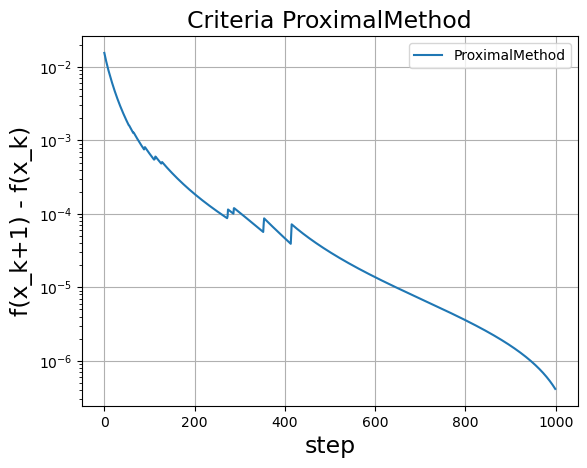

In [195]:
x_axis, y_axis = [], []
for history in [history_prox]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['ProximalMethod']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, 'Criteria ProximalMethod', scale='log')

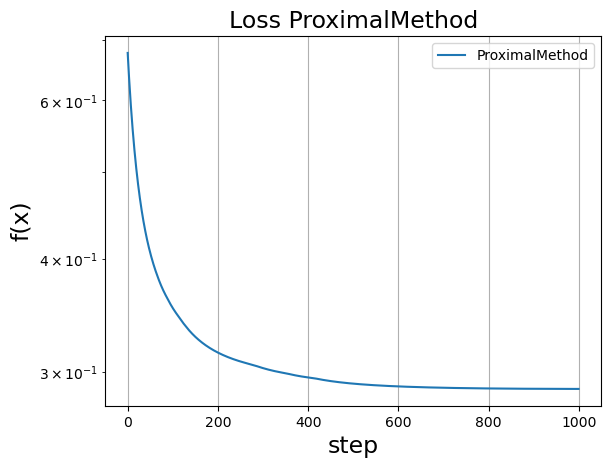

In [196]:
x_axis, y_axis = [], []
for history in [history_prox]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['ProximalMethod']
plot(x_axis, y_axis, 'step', 'f(x)', labels, 'Loss ProximalMethod', scale='log')

Выведите решение, полученный с помощью проксимального метода. Сделайте вывод.

In [197]:
#ваше решение (Code и Markdown)

In [198]:
history_prox[-1]

[4.1333442873936477e-07, 0.28692817542761356, 5.6423327922821045, 0.968]

In [199]:
prox.weigth

array([-0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.25246069,  0.        , -0.        , -0.73024364,
       -0.        ,  0.        ,  1.81811125, -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.01126884, -0.52445081, -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.30354613,  0.        ,
        0.        ,  0.        , -0.03696115,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.  

__г). (15 баллов)__ Изучите, какую дает модель обученная с помощью проксимального метода Франк-Вульфа. Варьируйте $c = 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1$. Постройте три графика: 1) точность итоговой модели от $c$, 2) количество ненулевых компонент в итоговом решении проксимального метода от $с$, 3) точность от количества ненулевых компонент в итоговом решении. Сравните с результами для метода Франк-Вульфа. Сделайте вывод.

In [3]:
#ваше решение (Code и Markdown)

In [58]:
histories, weigth_zeros = [], []
for c in [1e-4, 1e-3, 1e-2, 1e-1, 1e-0]:
    prox = ProximalMethod(X_train, y_train)
    
    weigth, history = prox.fit(lamda=L*c, X_test=X_test, y_test=y_test)
    histories.append(history)
    weigth_zeros.append((weigth!=0).sum())

In [59]:
for h in histories:
    print(len(h), h[-1])

1000 [1.4812916066017645e-05, 0.03387726101810163, 5.706125974655151, 0.9981538461538462]
1000 [7.718400696327121e-06, 0.12077680470679454, 5.4026360511779785, 0.9735384615384616]
1000 [1.1624129436782482e-10, 0.4662276865291269, 5.8458850383758545, 0.947076923076923]
1 [0.0, 0.6931471805599453, 0.0048389434814453125, 0.5187692307692308]
1 [0.0, 0.6931471805599453, 0.004796028137207031, 0.5187692307692308]


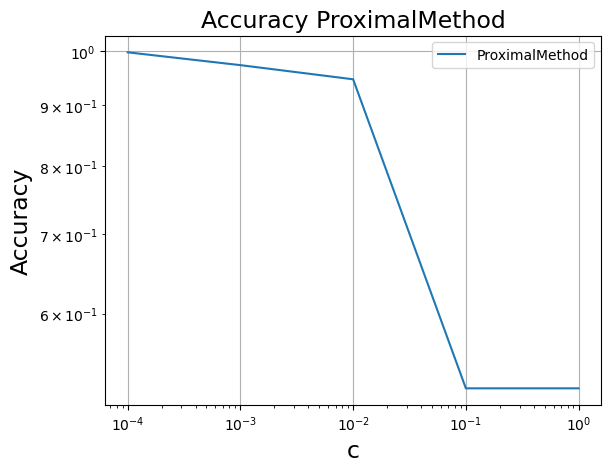

In [60]:
x_axis, y_axis = [], []
for c, history in zip([1e-4, 1e-3, 1e-2, 1e-1, 1e-0], histories):
    x_axis.append(c)
    y_axis.append(history[-1][-1])
labels = ['ProximalMethod']
plot([x_axis], [y_axis], 'c', 'Accuracy', labels, 'Accuracy ProximalMethod', scale='log', xscale='log')

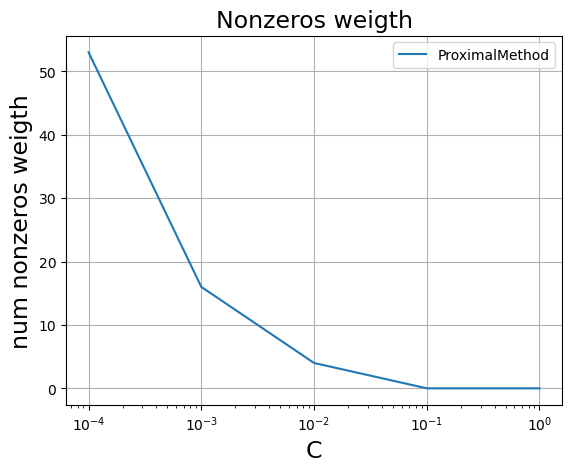

In [65]:
x_axis, y_axis = [], []
for c, history in zip([1e-4, 1e-3, 1e-2, 1e-1, 1e-0], weigth_zeros):
    x_axis.append(c)
    y_axis.append(history)
labels = ['ProximalMethod']
plot([x_axis], [y_axis], 'C', 'num nonzeros weigth', labels, 'Nonzeros weigth', xscale='log')

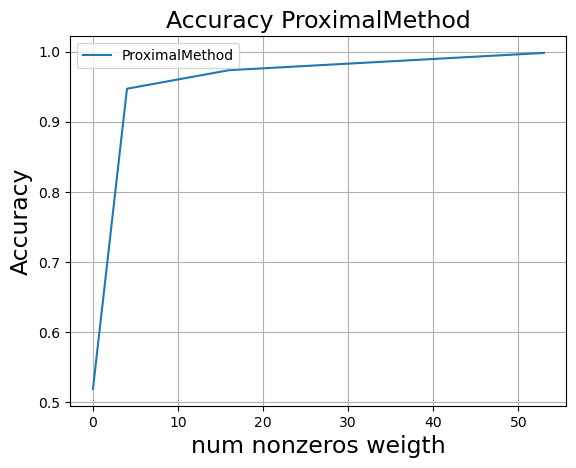

In [66]:
x_axis, y_axis = [], []
for w, history in zip(weigth_zeros, histories):
    x_axis.append(w)
    y_axis.append(history[-1][-1])
labels = ['ProximalMethod']
plot([x_axis], [y_axis], 'num nonzeros weigth', 'Accuracy', labels, 'Accuracy ProximalMethod')

Видно, что при больших С метод не сходится.. Видно так же, что значение лосса примерно такое же как и у метода Франк-Вульфа. Видно, что чем меньше С, то тем меньше количество нулевых компонент вектора весов, что опять же объяснимо из алгоритма метода. Как и во Франк-Вульфе можно заметить, что чем больше количество ненулевых весов, тем выше точность, что в целом логично. Получим, что оба метода могут проводить регуляризацию весов и достигать приемлемого качества.

### Часть 2. Игра

На лекциях мы познакомились с экстраградиентным методом и зеркальным спуском. Первый предназначен для решения седловых задач, второй - для лучшего учета "геометрии" задачи. Попробуем объединить эти две идеи и получим следующий метод:
\begin{align}
\label{eq:1}
x^{k+1/2} &= \arg\min_{x \in \mathcal{X}} (\gamma\langle \nabla_x f(x^k, y^k), x\rangle + V(x,x^k))
\\
y^{k+1/2} &= \arg\min_{y \in \mathcal{Y}} (\gamma\langle - \nabla_y f(x^k, y^k), y\rangle + V(y,y^k))
\\
\label{eq:2}
x^{k+1} &= \arg\min_{x \in \mathcal{X}} (\gamma\langle \nabla_x f(x^{k+1/2}, y^{k+1/2}), x\rangle + V(x,x^k))
\\
y^{k+1} &= \arg\min_{y \in \mathcal{Y}} (\gamma\langle - \nabla_y f(x^{k+1/2}, y^{k+1/2}), y\rangle + V(y,y^k)),
\end{align}
где $\gamma > 0$ - шаг метода.
Для краткости введем обозначения, как на лекции:
$$
z = \binom{x}{y} \quad F(z) = F(x,y) = \binom{\nabla_x f(x, y)}{- \nabla_y f(x, y)}
$$
В новых обозначениях метод выше можно переписать, как
\begin{align}
z^{k+1/2} &= \arg\min_{z \in \mathcal{Z}} (\gamma\langle F(z^k), z\rangle + V(z,z^k))
\\
z^{k+1} &= \arg\min_{z \in \mathcal{Z}} (\gamma\langle F(z^{k+1/2}), z\rangle + V(z,z^k)).
\end{align}

Пусть оператор $F$ является $L$-Липшицевым (следует из Липшицевости градиентов):
$$
\| F(z_1) - F(z_2) \|_* \leq L \| z_1 - z_2\|,
$$
а функция $f$ является выпукло-вогнутой.

__Задача 1. $\triangle$ (20 баллов)__ Попробуем доказать сходимость данного метода, для этого понадобятся доказательства экстраградиентного метода и зеркального спуска. Объясняйте переходы там, где они кажутся неочевидными.

Для начала запишем условие оптимальности для каждой из строк рассматриваемого метода (см. как мы писали условие оптимальности в случае зеркального спуска). Для первой строки метода запишите с участие произвольной точки $u \in \mathcal{Z}$:

In [240]:
#ваше решение (Markdown)

Для каждой точки $ ( u \in \mathcal{Z} )$, оптимальная точка $( z^{k+1/2} )$ удовлетворяет условию:
    $ \gamma \langle -\nabla_y f(x^k, y^{k+1/2}), u - z^{k+1/2} \rangle + V(u, z^{k+1/2}) \geq 0, $

Для второй строки метода запишите с участие произвольной точки $z \in \mathcal{Z}$:

In [ ]:
#ваше решение (Markdown)

Подобно первой строке, рассмотрим условие оптимальности используя произвольную точку $ z \in \mathcal{Z}$ и фокусируясь на обновлении $ x $:

1. Для каждой точки $ z \in \mathcal{Z} $, оптимальная точка $ x^{k+1}$ должна удовлетворять следующему условию:
   $\gamma \langle \nabla_x f(x^{k+1}, y^{k+1/2}), z - x^{k+1} \rangle + V(z, x^{k+1}) \geq 0, $

Теперь для обновления $ y$:
2. Для каждой точки $ z \in \mathcal{Y} $, оптимальная точка $ y^{k+1} $ должна удовлетворять условию:
    $ \gamma \langle -\nabla_y f(x^{k+1}, y^{k+1}), z - y^{k+1} \rangle + V(z, y^{k+1}) \geq 0, $

Эти условия оптимальности продолжают применять принцип, что в точке минимума производная функции по направлению к любой другой точке должна быть неотрицательной, что обеспечивается методом экстраградиентного спуска и использованием зеркальной дивергенции \( V \).


Далее воспользуемся "равенством параллелограмма" для дивергенции Брэгмана (мы его также доказывали на лекции про зеркальный спуск) и применим его к каждому из полученных выше условий оптимальности:

In [ ]:
#ваше решение (Markdown)

При применении этого равенства к условию оптимальности для обновления переменных $x$ и $y$, представленному ранее, мы можем указать следующее:

Для $x$:
$$
V(z, x^k) + V(x^k, x^{k+1}) = V(z, x^{k+1}) + V(x^{k+1}, x^k)
$$

Аналогичным образом для переменной $y$:

$$
V(z_y, y^k) + V(y^k, y^{k+1}) = V(z_y, y^{k+1}) + V(y^{k+1}, y^k)
$$

Сложим два выражения:

In [ ]:
#ваше решение (Markdown)

$$
\gamma (\langle \nabla_x F(x^{k+1}, y^{k+1/2}), z_x - x^{k+1} \rangle - \langle \nabla_y F(x^{k+1}, y^{k+1}), z_y - y^{k+1} \rangle) + (D_V(z_x, x^{k+1}) + D_V(z_y, y^{k+1})) \geq 0 
$$



В качестве точки $u$ подставьте некоторую точку из алгоритма ($z^k$, $z^{k+1/2}, z^{k+1}$). Подумайте, какая точка может подойти лучше (обратите внимание на доказательство экстраградиентного метода):

In [ ]:
#ваше решение (Markdown)

Проведите некоторые алгебраические преобразования с полученным неравенством, чтобы в итоге неравенство имело вид:
$\langle F(\tilde z), \tilde z - z \rangle \leq \ldots$, где $\tilde z$ - некоторая точка из алгоритма ($z^k$, $z^{k+1/2}, z^{k+1}$):

In [ ]:
#ваше решение (Markdown)

Воспользуйтесь неравенством Коши-Буняковского-Шварца, чтобы далее можно воспользоваться, тем, что оператор $F$ является $L$-Липшецевым:

In [ ]:
#ваше решение (Markdown)

А теперь воспользуйтесь $L$-Липшецевостью оператора $F$:

In [ ]:
#ваше решение (Markdown)

Вспомните, что если дивергенция Брэгмана порождена 1-сильно выпуклой функцией, то (как уже видели на лекции) $V(x,y) \geq \frac{1}{2} \| x - y\|^2$. Воспользуйтесь этим свойством, подберите шаг $\gamma$ так, что в итоге получить результат вида: $\langle F(\tilde z), \tilde z - z \rangle \leq R_k - R_{k+1}$:

In [ ]:
#ваше решение (Markdown)

Доведите доказательство до конца (смотрите доказательство экстраградиентного метода) и сформулируйте теорему о сходимости предложенного метода для выпукло-вогнутых $L$-гладких седловых задач.

In [ ]:
#ваше решение (Markdown)

__Задача 2. (40 баллов)__ Рассмотрим следующую билинейную задачу на симплексах:
$$
\min_{x \in \mathcal{X}} \max_{y \in \mathcal{Y}} f(x,y) = x^T A y,
$$
где $X = \{ x \in \mathbb{R}^d \mid x_i \geq 0 , \sum_{i=1}^d x_i = 1\}$, $Y = \{ y \in \mathbb{R}^d \mid y_i \geq 0 , \sum_{i=1}^d y_i = 1\}$, $A \in \mathbb{R^{d \times d}}$.

Такую задачу часто называют матричной игрой. В этом задании будет конкретная игра "Вор и полицейский".

Пусть город представляет собой квадрат из $n \times n$ маленьких квадратиков. В каждом квадратике стоит дом и полицейская будка рядом с ним. Пусть так же известны ценность дома для вора $w_{i}$ в квадрате $i$. Каждую ночь вор выбирает, какой дом ограбить, а полицейский выбирает будку, в которой будет дежурить. Вероятность поимки вора, если вор грабит дом в квадрате $j$, а полисмен дежурит в квадрате $i$ равна:
    $$\exp(- \alpha  \cdot \text{dist}(i,j)).$$ 
Здесь $\alpha > 0$ - некторый параметр, т.е. вероятность уменьшается с увеличением расстояния между квадратами.
Вор хочет максимизировать свою ожидаемую прибыль:
    $$w_j \left(1 -  \exp(- \alpha \cdot \text{dist}(i,j))\right).$$
Полицейский наоборот - минимизировать.

Такую постановку можно формализовать в виде матричной игры: занумеруем все дома от $0$ до $d = n^2 - 1$, получится вектор $w \in \mathbb{R}^{d}$ стоимостей домов. В элемент $A_{ij}$ матрицы $A$ запишем:
$$A_{ij} = w_j \left(1 - \exp(- \alpha \cdot \text{dist}(i,j))\right),$$
т.е. ожидаемую прибыль вора, если он будет грабить дом с номером $j$, а полицейский дежурить в доме с номером $i$. В векторах $x$ и $y$ будут хранится вероятностные стратегии для полицийского и вора: вероятность выбрать тот или иной дом для дежурства или грабежа. Цель задания найти равновестные стратегии. 

Возьмем $n = 10$. Следующий код генерирует некоторое распределение ценностей домов $w$ и матрицу $A$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [8]:
def dist(i, j, n):
    i_x = i % n
    i_y = i // n
    j_x = j % n
    j_y = j // n
    return np.linalg.norm([i_x - j_x, i_y - j_y], 2)

def game(n = 10):
    i_max = (n // 2) * (n + 1)
    w = np.array([1. / (dist(i, i_max, n) + 20) for i in range(n ** 2)])
    A = np.zeros([n ** 2, n ** 2])
    for i in range(n ** 2):
        for j in range(n ** 2):
            A[i,j] = w[j] * (1 - np.exp(- dist(i, j, n)))
    return A, w

In [9]:
n = 10
A, w = game(n)

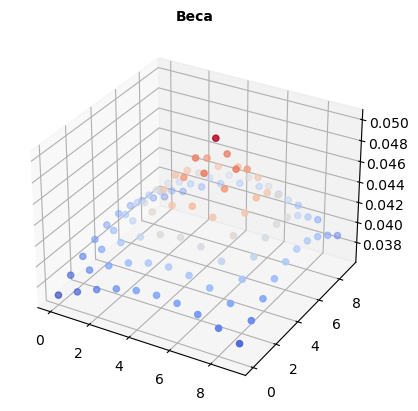

In [10]:
X, Y = np.meshgrid(range(n), range(n))
X = X.ravel()
Y = Y.ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, w, c = w, cmap=cm.coolwarm)
ax.set_title(f"Веса", fontsize = 10, fontweight='bold')

plt.show()

На графике выше визуализированны стоимости домов в городе: в центре самые дорогие, на окраинах бедные.

Для игровой задачи запишите явный вид метода, для которого доказывали сходимость в Задаче 1 (на лекции мы тоже работали с симплексом). Реализуйте в виде кода.

In [ ]:
#ваше решение (Code и Markdown)

Запишем метод для первых двух строчек (2 другие абсолютно аналогично)
\begin{align}
\label{eq:1}
x^{k+1/2} &= \arg\min_{x \in \mathcal{X}} (\gamma\langle \nabla_x f(x^k, y^k), x\rangle + V(x,x^k))
\\
y^{k+1/2} &= \arg\min_{y \in \mathcal{Y}} (\gamma\langle - \nabla_y f(x^k, y^k), y\rangle + V(y,y^k))
\end{align}

$f(x, y) = xAy, V(x, y) = \frac{1}{2}\|x - y\|^2 $. Функции, стоящие под аргминимумом - выпуклы. Поэтому чтобы найти аргминимум, необходимо найти производную функции и приравнять её к нулю:
$$
\gamma Ay + (x - x^k) = 0 \Rightarrow x = x^k - \gamma Ay
$$

$$
-\gamma A^Tx + (y - y^k) = 0 \Rightarrow y = y^k + \gamma A^Tx
$$

Таким образом, получим:
$$
x^{k + 1/2} = x^k - \gamma Ay^k
$$
$$
y^{k + 1/2} = y^k + \gamma A^Tx^k
$$

$$
x^{k + 1} = x^k - \gamma Ay^{k + 1/2}
$$
$$
y^{k + 1} = y^k + \gamma A^Tx^{k + 1/2}
$$

Для вероятностного симплекса

$f(x, y) = xAy, V(x, y) = \sum x_i \log \frac{x_i}{y_i} $. Функции, стоящие под аргминимумом - выпуклы. Поэтому чтобы найти аргминимум, необходимо найти производную функции и приравнять её к нулю:
$$
\gamma Ay + \log \frac{x}{x_k} + 1 = 0 \Rightarrow x = x^k \exp(-1 - \gamma Ay)
$$
Учитывая вероятностный симплекс получим:
$$
x_i^{k+1} = \frac{x^k_i \exp(- \gamma (Ay)_i)}{\sum x^k_i \exp(- \gamma (Ay)_i)}
$$

$$
-\gamma A^Tx + \log \frac{y}{y_k} + 1 = 0 \Rightarrow y_i^{k+1} = \frac{y^k_i \exp(\gamma (A^Tx)_i)}{\sum y^k_i \exp(- \gamma (A^Tx)_i)}
$$

Таким образом, получим:
$$
x^{k + 1/2} = \frac{x^k \odot  \exp(- \gamma Ay^k)}{x^k \exp(- \gamma Ay^k)}
$$
$$
y^{k + 1/2} = \frac{y^k \odot \exp(\gamma A^Tx^k)}{y^k \exp(- \gamma A^Tx^k)}
$$

$$
x^{k + 1} = \frac{x^k \odot \exp(- \gamma Ay^{k + 1/2})}{ x^k \exp(- \gamma Ay^{k + 1/2})}
$$
$$
y^{k + 1} = \frac{y^k \odot \exp(\gamma A^Tx^{k + 1/2})}{ y^k \exp(- \gamma A^Tx^{k + 1/2})}
$$


In [264]:
def project_simplex(v):
    """ Проекция вектора v на симплекс. """
    n = len(v)
    v_sorted = np.sort(v)[::-1]
    cumulative_sum = np.cumsum(v_sorted) - 1
    rho = np.nonzero(v_sorted - cumulative_sum / np.arange(1, n+1) > 0)[0][-1]
    theta = cumulative_sum[rho] / (rho + 1)
    return np.maximum(v - theta, 0)

def new_method(A, gamma, criteria, max_iter=10**3, eps=1e-8):
    x = np.random.rand(A.shape[0])
    y = np.random.rand(A.shape[1])
    x, y = x/x.sum(), y/y.sum()
    history = [criteria(A, x, y)]
    for i in range(max_iter):
        x_half = x - gamma * A@y
        y_half = y + gamma * A.T@x  
        x_half = project_simplex(x_half)
        y_half = project_simplex(y_half)
        
        x_new = x - gamma * A@y_half
        y_new = y + gamma * A.T@x_half
        x = project_simplex(x_new)
        y = project_simplex(y_new)
        
        history.append(criteria(A, x_new, y_new))
#         if abs(history[-1] - history[-2]) < eps:
#             break
        
    return x, y, history

In [22]:
def new_method_simplex(A, gamma, criteria, max_iter=10**3, eps=1e-8):
    x = np.random.rand(A.shape[0])
    y = np.random.rand(A.shape[1])
    x, y = x/x.sum(), y/y.sum()
    history = [criteria(A, x, y)]
    for i in range(max_iter):
        x_half = x*np.exp(-gamma*A@y)
        y_half = y*np.exp(gamma*A.T@x)
        x_half, y_half = x_half/x_half.sum(), y_half/y_half.sum()
        
        x_new = x*np.exp(-gamma*A@y_half)
        y_new = y*np.exp(gamma*A.T@x_half)
        x, y = x_new/x_new.sum(), y_new/y_new.sum()
        
        
        history.append(criteria(A, x, y))
        
        
        
    return x, y, history

Оцените константу $L$ (смотри Задачу 1) для игровой задачи. В качестве критерия используйте следующее выражение:
$$
\text{gap}(x^k, y^k) = \max_{y \in \mathcal{Y}} f(x^k, y) - \min_{x \in \mathcal{X}} f(x, y^k), \quad \text{или} \quad \text{gap}\left( \frac{1}{k} \sum_{i=0}^{k-1} x^i, \frac{1}{k}\sum_{i=0}^{k-1} y^k \right)
$$
Выпишите явный вид подсчета $\text{gap}(x^k, y^k)$ и реализуйте его (задача не зря называется билинейной).

In [ ]:
#ваше решение (Code и Markdown)

### Оценка константы $L$
1. Для $ \nabla_x f(x, y) $:
$ \| \nabla_x f(x, y_1) - \nabla_x f(x, y_2) \| = \| A y_1 - A y_2 \| \leq \| A \| \| y_1 - y_2 \| $

2. Для $ \nabla_y f(x, y) $:
$ \| \nabla_y f(x_1, y) - \nabla_y f(x_2, y) \| = \| A^T x_1 - A^T x_2 \| = \| A^T \| \| x_1 - x_2 \|$

Получим, что $  \: L = \| A \|$


### Подсчет $\text{gap}(x^k, y^k)$
$f(x, y) = xAy$, $xA \in \mathbb{R}^d$, $Ay \in \mathbb{R}^d$. 

На вероятностном симлексе максимум выражения $(xA)\: y$ будет достигаться, если всю вероятностную массу $y$ положить в координату $max_i (xA)_{[i]}$. Они все положительны, так как $x_i \geq 0$ $A_{ij} \geq 0$.

Аналогично с $x$: минимум выражения $x \: (Ay)$ будет достигаться, если всю вероятностную массу $x$ положить в координату $min_i (Ay)_{[i]}$

In [12]:
def gap(A, x, y):
    return max(x.T @ A) - min(A@y)

L = np.linalg.norm(A, ord=2)
L, 1/L

(3.998473057015691, 0.2500954703809764)

С помощью реализованного метода решите игровую задачу. Рекомендуется подбирать шаг и брать его значительно больше $\frac{1}{L}$. Постройте график сходимости: значение критерия сходимости от номера итерации.

In [ ]:
#ваше решение (Code и Markdown)

In [270]:
x_01, y_01, history_01 = new_method(A, gamma=0.1, criteria=gap)
x_05, y_05, history_05 = new_method(A, gamma=0.5, criteria=gap)
x_07, y_07, history_07 = new_method(A, gamma=0.7, criteria=gap)
x_1, y_1, history_1 = new_method(A, gamma=1, criteria=gap)

In [23]:
x_01, y_01, history_01 = new_method_simplex(A, gamma=0.1, criteria=gap)
x_05, y_05, history_05 = new_method_simplex(A, gamma=0.5, criteria=gap)
x_07, y_07, history_07 = new_method_simplex(A, gamma=0.7, criteria=gap)
x_1, y_1, history_1 = new_method_simplex(A, gamma=1, criteria=gap)

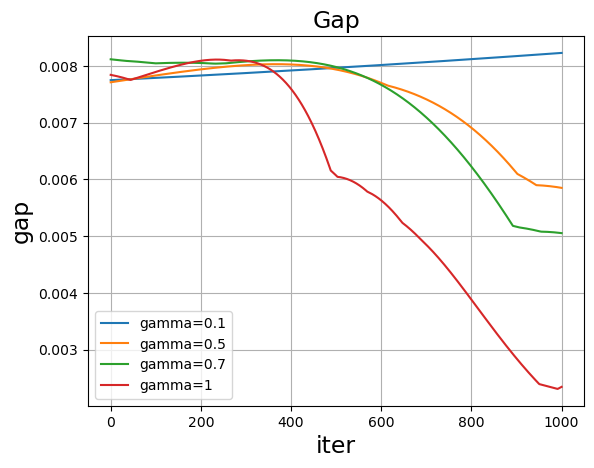

In [24]:
x_axis, y_axis = [], []
for history in [history_01, history_05, history_07, history_1]:
    x_axis.append(list(range(len(history))))
    y_axis.append(history)
labels = ['gamma=0.1', 'gamma=0.5', 'gamma=0.7', 'gamma=1']
plot(x_axis, y_axis, 'iter', 'gap', labels, 'Gap')

Визуализируйте решение $x^*$ и $y^*$ на карте города. В этом может помочь визуализация весов выше. Сделайте вывод. Насколько результат кажется натуральным и интепретируемым?

In [25]:
#ваше решение (Code и Markdown)

In [26]:
(x_1-x_01).sum(), (y_1-y_01).sum()

(3.469446951953614e-17, -3.122502256758253e-17)

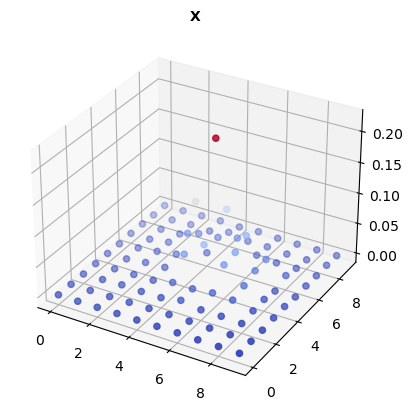

In [27]:
X, Y = np.meshgrid(range(n), range(n))
X = X.ravel()
Y = Y.ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, x_1, c = x_1, cmap=cm.coolwarm)
ax.set_title(f"X", fontsize = 10, fontweight='bold')

plt.show()

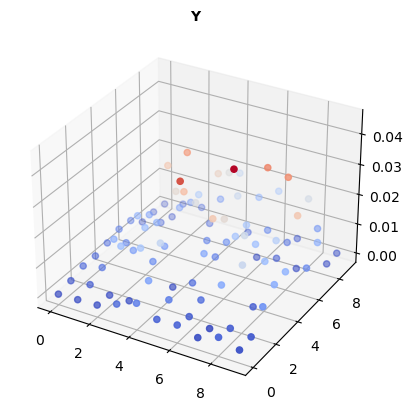

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, y_1, c = y_1, cmap=cm.coolwarm)
ax.set_title(f"Y", fontsize = 10, fontweight='bold')

plt.show()

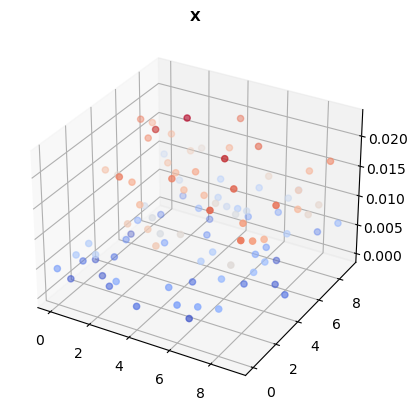

In [29]:
X, Y = np.meshgrid(range(n), range(n))
X = X.ravel()
Y = Y.ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, x_01, c = x_01, cmap=cm.coolwarm)
ax.set_title(f"X", fontsize = 10, fontweight='bold')

plt.show()

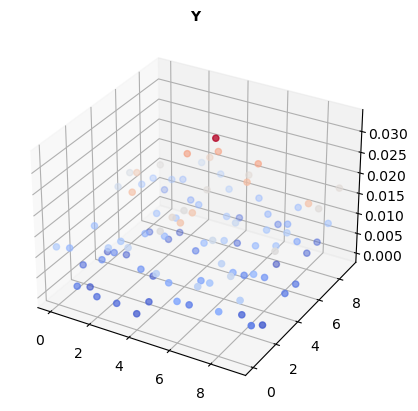

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, y_01, c = y_01, cmap=cm.coolwarm)
ax.set_title(f"Y", fontsize = 10, fontweight='bold')

plt.show()

Видно, то полицейским выгодно охранять дома в центре. Так же заметно, что чем выше гамма, тем сильнее размыта вероятностный вектор что у $x$ что у $y$. Зато при низких гамма получим, что воры в более большом плюсе 